<center><h1>Scania Trucks APS Failure</h1></center>

In [1]:
import pandas as pd

import matplotlib.pyplot as plt                       
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import glob
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

import numpy as np
import scipy.stats as st


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
import statsmodels.api as sm
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import math
##from skmultilearn.problem_transform import LabelPowerset
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# from sklearn.metrics import plot_roc_curve

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('../Data/aps_failure_training_set.csv', skiprows=20)

In [3]:
test_data = pd.read_csv('../Data/aps_failure_test_set.csv', skiprows=20)

In [4]:
train_data

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384   721044   469792   339156  157956   73224   
1          0  ...   421400  178064   293306   245416   133654   81140   97576   
2          0  ...   277378  159812   423992   409564   320746  158022   95128   
3          0  ...      240      46       58       44       10       0       0   
4          0  ...   622012  229790   405298   347188   286954  311560  433954   
...      ...  ...      ...     ...      ...      ...      ...     ...     ...   
59995      0  ...   998500  566884  1290398  1218244  1019768  717762  898642   
59996      0  ...    10578    6760    21126    68424      136       0       0   
59997      0  ...      792     386      452      144      146    2622       0   
59998      0  ...   699352  222654   347378   225724   194440  165070  802280   
59999      0  ...   440066  183200   344546   254068   225148  158304  170384   

       ee_009 ef_000 eg_000  
0           0      0      0  
1        1500      0      0  
2         514      0      0  
3           0      4     32  
4        1218      0      0  
...       ...    ...    ...  
59995   28588      0      0  
59996       0      0      0  
59997       0      0      0  
59998  388422      0      0  
59999     158      0      0  

[60000 rows x 171 columns]

In [5]:
test_data

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816     na        1010    936      0      0      0      0   
4       neg    1814     na         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852     na  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636     na        1670   1518      0      0      0      0   
15998   neg     110     na          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008  \
0          0  ...    1098     138     412     654       78      88       0   
1          0  ...    1068     276    1620     116       86     462       0   
2          0  ...  495076  380368  440134  269556  1315022  153680     516   
3          0  ...  540820  243270  483302  485332   431376  210074  281662   
4          0  ...    7646    4144   18466   49782     3176     482      76   
...      ...  ...     ...     ...     ...     ...      ...     ...     ...   
15995      0  ...  632658  273242  510354  373918   349840  317840  960024   
15996      0  ...     266      44      46      14        2       0       0   
15997      0  ...  806832  449962  778826  581558   375498  222866  358934   
15998      0  ...     588     210     180     544     1004    1338      74   
15999      0  ...      46      10      48      14       42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1          0      0      0  
2          0      0      0  
3       3232      0      0  
4          0      0      0  
...      ...    ...    ...  
15995  25566      0      0  
15996      0      0      0  
15997  19548      0      0  
15998      0      0      0  
15999      0      0      0  

[16000 rows x 171 columns]

In [6]:
train_data = train_data.replace("na",np.nan)

In [7]:
test_data = test_data.replace("na",np.nan)

In [8]:
train_data.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [9]:
full_dataset = pd.concat([train_data, test_data],ignore_index=True)

In [10]:
full_dataset

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852    NaN  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636    NaN        1670   1518      0      0      0      0   
75998   neg     110    NaN          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

In [11]:
full_dataset['class'].value_counts()['pos']

1375

In [12]:
full_dataset['class'].value_counts()['neg']

74625

In [13]:
full_dataset_X = full_dataset.drop(columns=['class'])

In [14]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(full_dataset_X)
full_dataset_X.iloc[:,:]= imputer.transform(full_dataset_X)

In [15]:
full_dataset_X.isna().sum()

aa_000    0
ab_000    0
ac_000    0
ad_000    0
ae_000    0
         ..
ee_007    0
ee_008    0
ee_009    0
ef_000    0
eg_000    0
Length: 170, dtype: int64

In [16]:
full_dataset_Y = full_dataset['class']

In [17]:
full_dataset_Y = full_dataset_Y.map({'pos':1, 'neg':0})

In [18]:
full_dataset_Y

0        0
1        0
2        0
3        0
4        0
        ..
75995    0
75996    0
75997    0
75998    0
75999    0
Name: class, Length: 76000, dtype: int64

In [19]:
Train_data_X = full_dataset_X.iloc[:60000,:]
Test_data_X = full_dataset_X.iloc[60000:,:]
Train_data_Y = full_dataset_Y.iloc[:60000]
Test_data_Y = full_dataset_Y.iloc[60000:]
print(Train_data_X,Test_data_X, Train_data_Y, Test_data_Y )

         aa_000   ab_000        ac_000         ad_000  ae_000  af_000  ag_000  \
0       76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0     0.0   
1       33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0     0.0   
2       41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0     0.0   
3          12.0  0.00000  7.000000e+01      66.000000     0.0    10.0     0.0   
4       60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0     0.0   
...         ...      ...           ...            ...     ...     ...     ...   
59995  153002.0  0.72556  6.640000e+02     186.000000     0.0     0.0     0.0   
59996    2286.0  0.72556  2.130707e+09     224.000000     0.0     0.0     0.0   
59997     112.0  0.00000  2.130706e+09      18.000000     0.0     0.0     0.0   
59998   80292.0  0.72556  2.130706e+09     494.000000     0.0     0.0     0.0   
59999   40222.0  0.72556  6.980000e+02     628.000000     0.0     0.0     0.0   

       ag_001  ag_002  ag_0

In [20]:
data_features = full_dataset_X.columns
data_features

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)

In [21]:
cv_list=[]

for i in data_features:
    temp_list=[]
    d1=full_dataset_X[i]
    sd=d1.std()
    mn=d1.mean()
    f=round(sd/mn,3)
    temp_list.append(i)
    temp_list.append(f)
    cv_list.append(temp_list)
    

In [22]:
list_CV = []

for feature in data_features:
    temp =[]
    data= full_dataset_X[feature]
    std_dev = data.std()
    mean = data.mean()
    cv = round(std_dev/mean,3)
    temp.append(feature)
    temp.append(cv)
    list_CV.append(temp)

In [23]:
from tabulate import tabulate
print(tabulate(list_CV,headers=['Features','Coefficient of Variation(CV)']))

Features      Coefficient of Variation(CV)
----------  ------------------------------
aa_000                               4.329
ab_000                               2.178
ac_000                               2.168
ad_000                             206.721
ae_000                              22.294
af_000                              18.209
ag_000                              91.461
ag_001                              42.084
ag_002                              17.626
ag_003                               8.753
ag_004                               5.475
ag_005                               2.964
ag_006                               2.353
ag_007                               2.812
ag_008                               6.275
ag_009                              32.167
ah_000                               2.316
ai_000                              18.506
aj_000                              43.144
ak_000                              78.623
al_000                               9.112
am_0       

In [24]:
list_CV[1][1]

2.178

In [25]:
corr = full_dataset_X.corr()
corr.style.background_gradient(cmap='coolwarm')

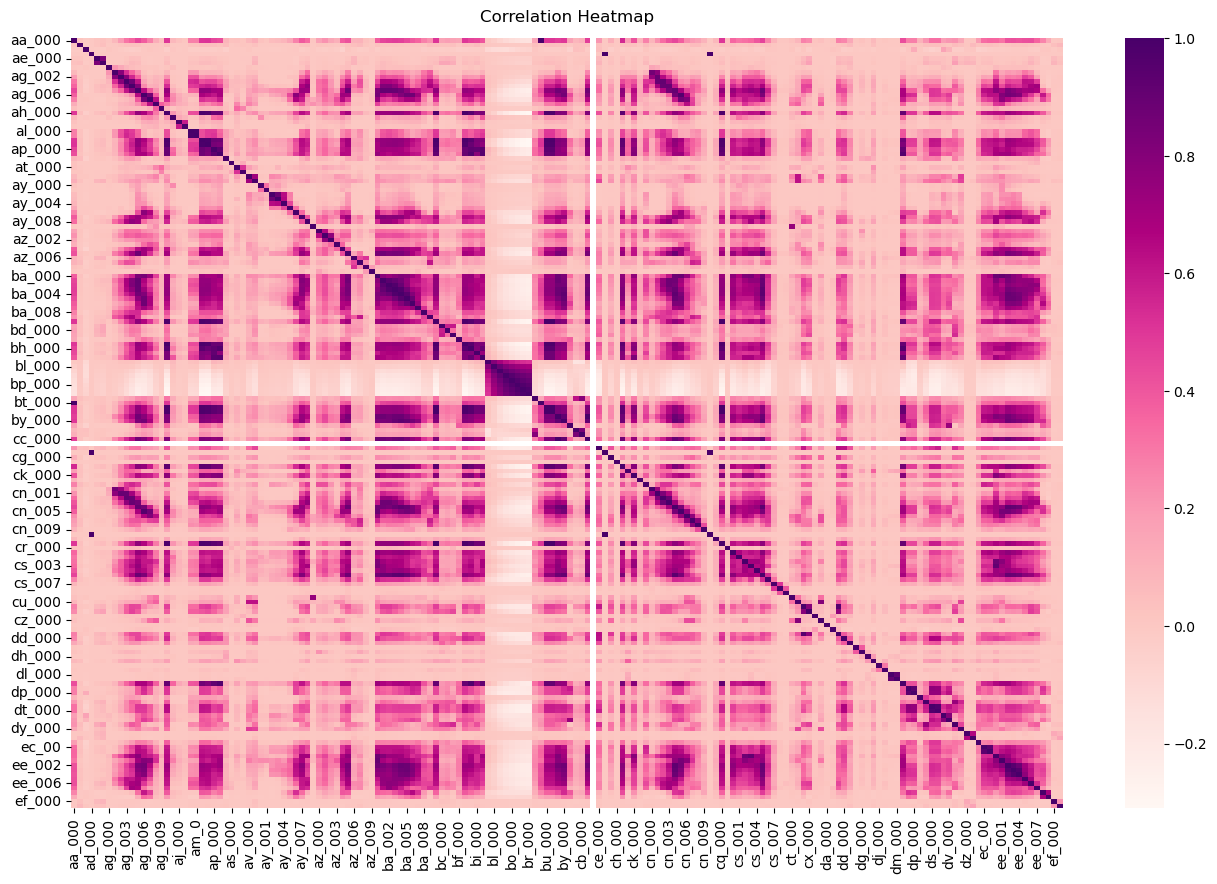

In [26]:
plt.close()
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap( full_dataset_X.corr(), cmap='RdPu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [27]:
list_CV.sort(key= lambda x:x[1], reverse= True)
list_CV

[['cf_000', 207.27],
 ['co_000', 206.876],
 ['ad_000', 206.721],
 ['cs_009', 192.523],
 ['dj_000', 122.128],
 ['as_000', 113.883],
 ['dh_000', 112.652],
 ['df_000', 111.37],
 ['ag_000', 91.461],
 ['au_000', 86.086],
 ['ak_000', 78.623],
 ['az_009', 78.0],
 ['ay_009', 77.461],
 ['ch_000', 57.498],
 ['cs_008', 57.202],
 ['ay_001', 49.249],
 ['dz_000', 49.249],
 ['ef_000', 47.92],
 ['eg_000', 45.651],
 ['aj_000', 43.144],
 ['ag_001', 42.084],
 ['ay_000', 40.903],
 ['ay_002', 38.342],
 ['dl_000', 37.457],
 ['dk_000', 36.518],
 ['dg_000', 34.677],
 ['dm_000', 34.552],
 ['ay_004', 33.04],
 ['ea_000', 32.777],
 ['ag_009', 32.167],
 ['cn_009', 30.961],
 ['ay_003', 28.33],
 ['cy_000', 28.006],
 ['cn_000', 27.975],
 ['da_000', 25.206],
 ['at_000', 23.187],
 ['az_008', 22.415],
 ['ae_000', 22.294],
 ['dq_000', 21.185],
 ['ai_000', 18.506],
 ['af_000', 18.209],
 ['ag_002', 17.626],
 ['az_007', 15.382],
 ['cp_000', 12.919],
 ['cn_001', 12.625],
 ['cr_000', 12.471],
 ['cl_000', 12.164],
 ['az_002', 

In [28]:
sqrt=math.sqrt(170)
sqrt

13.038404810405298

In [29]:
selected_features = []
j = 0
while (j<sqrt-1):
    selected_features.append(list_CV[j][0])
    j+=1
selected_features    

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'as_000',
 'dh_000',
 'df_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009']

In [30]:
selected_dataset = full_dataset_X[selected_features]

In [31]:
selected_plot_data = pd.concat([selected_dataset, full_dataset_Y], axis=1)

In [32]:
selected_plot_data

cf_000         co_000         ad_000  cs_009  dj_000  as_000  \
0           2.000000     220.000000     280.000000     0.0     0.0     0.0   
1      150231.156793  150517.375485  150629.962105     0.0     0.0     0.0   
2           0.000000       0.000000     100.000000     0.0     0.0     0.0   
3           2.000000       2.000000      66.000000     0.0     0.0     0.0   
4           0.000000     202.000000     458.000000     0.0     0.0     0.0   
...              ...            ...            ...     ...     ...     ...   
75995       2.000000      42.000000     892.000000     0.0     0.0     0.0   
75996       2.000000       0.000000      46.000000     0.0     0.0     0.0   
75997       2.000000     378.000000    1518.000000     0.0     0.0     0.0   
75998       0.000000       0.000000      32.000000     0.0     0.0     0.0   
75999       0.000000       0.000000       4.000000     0.0     0.0     0.0   

       dh_000  df_000  ag_000  au_000  ak_000  az_009  ay_009  class  
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
...       ...     ...     ...     ...     ...     ...     ...    ...  
75995     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
75996     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
75997     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
75998     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  
75999     0.0     0.0     0.0     0.0     0.0     0.0     0.0      0  

[76000 rows x 14 columns]

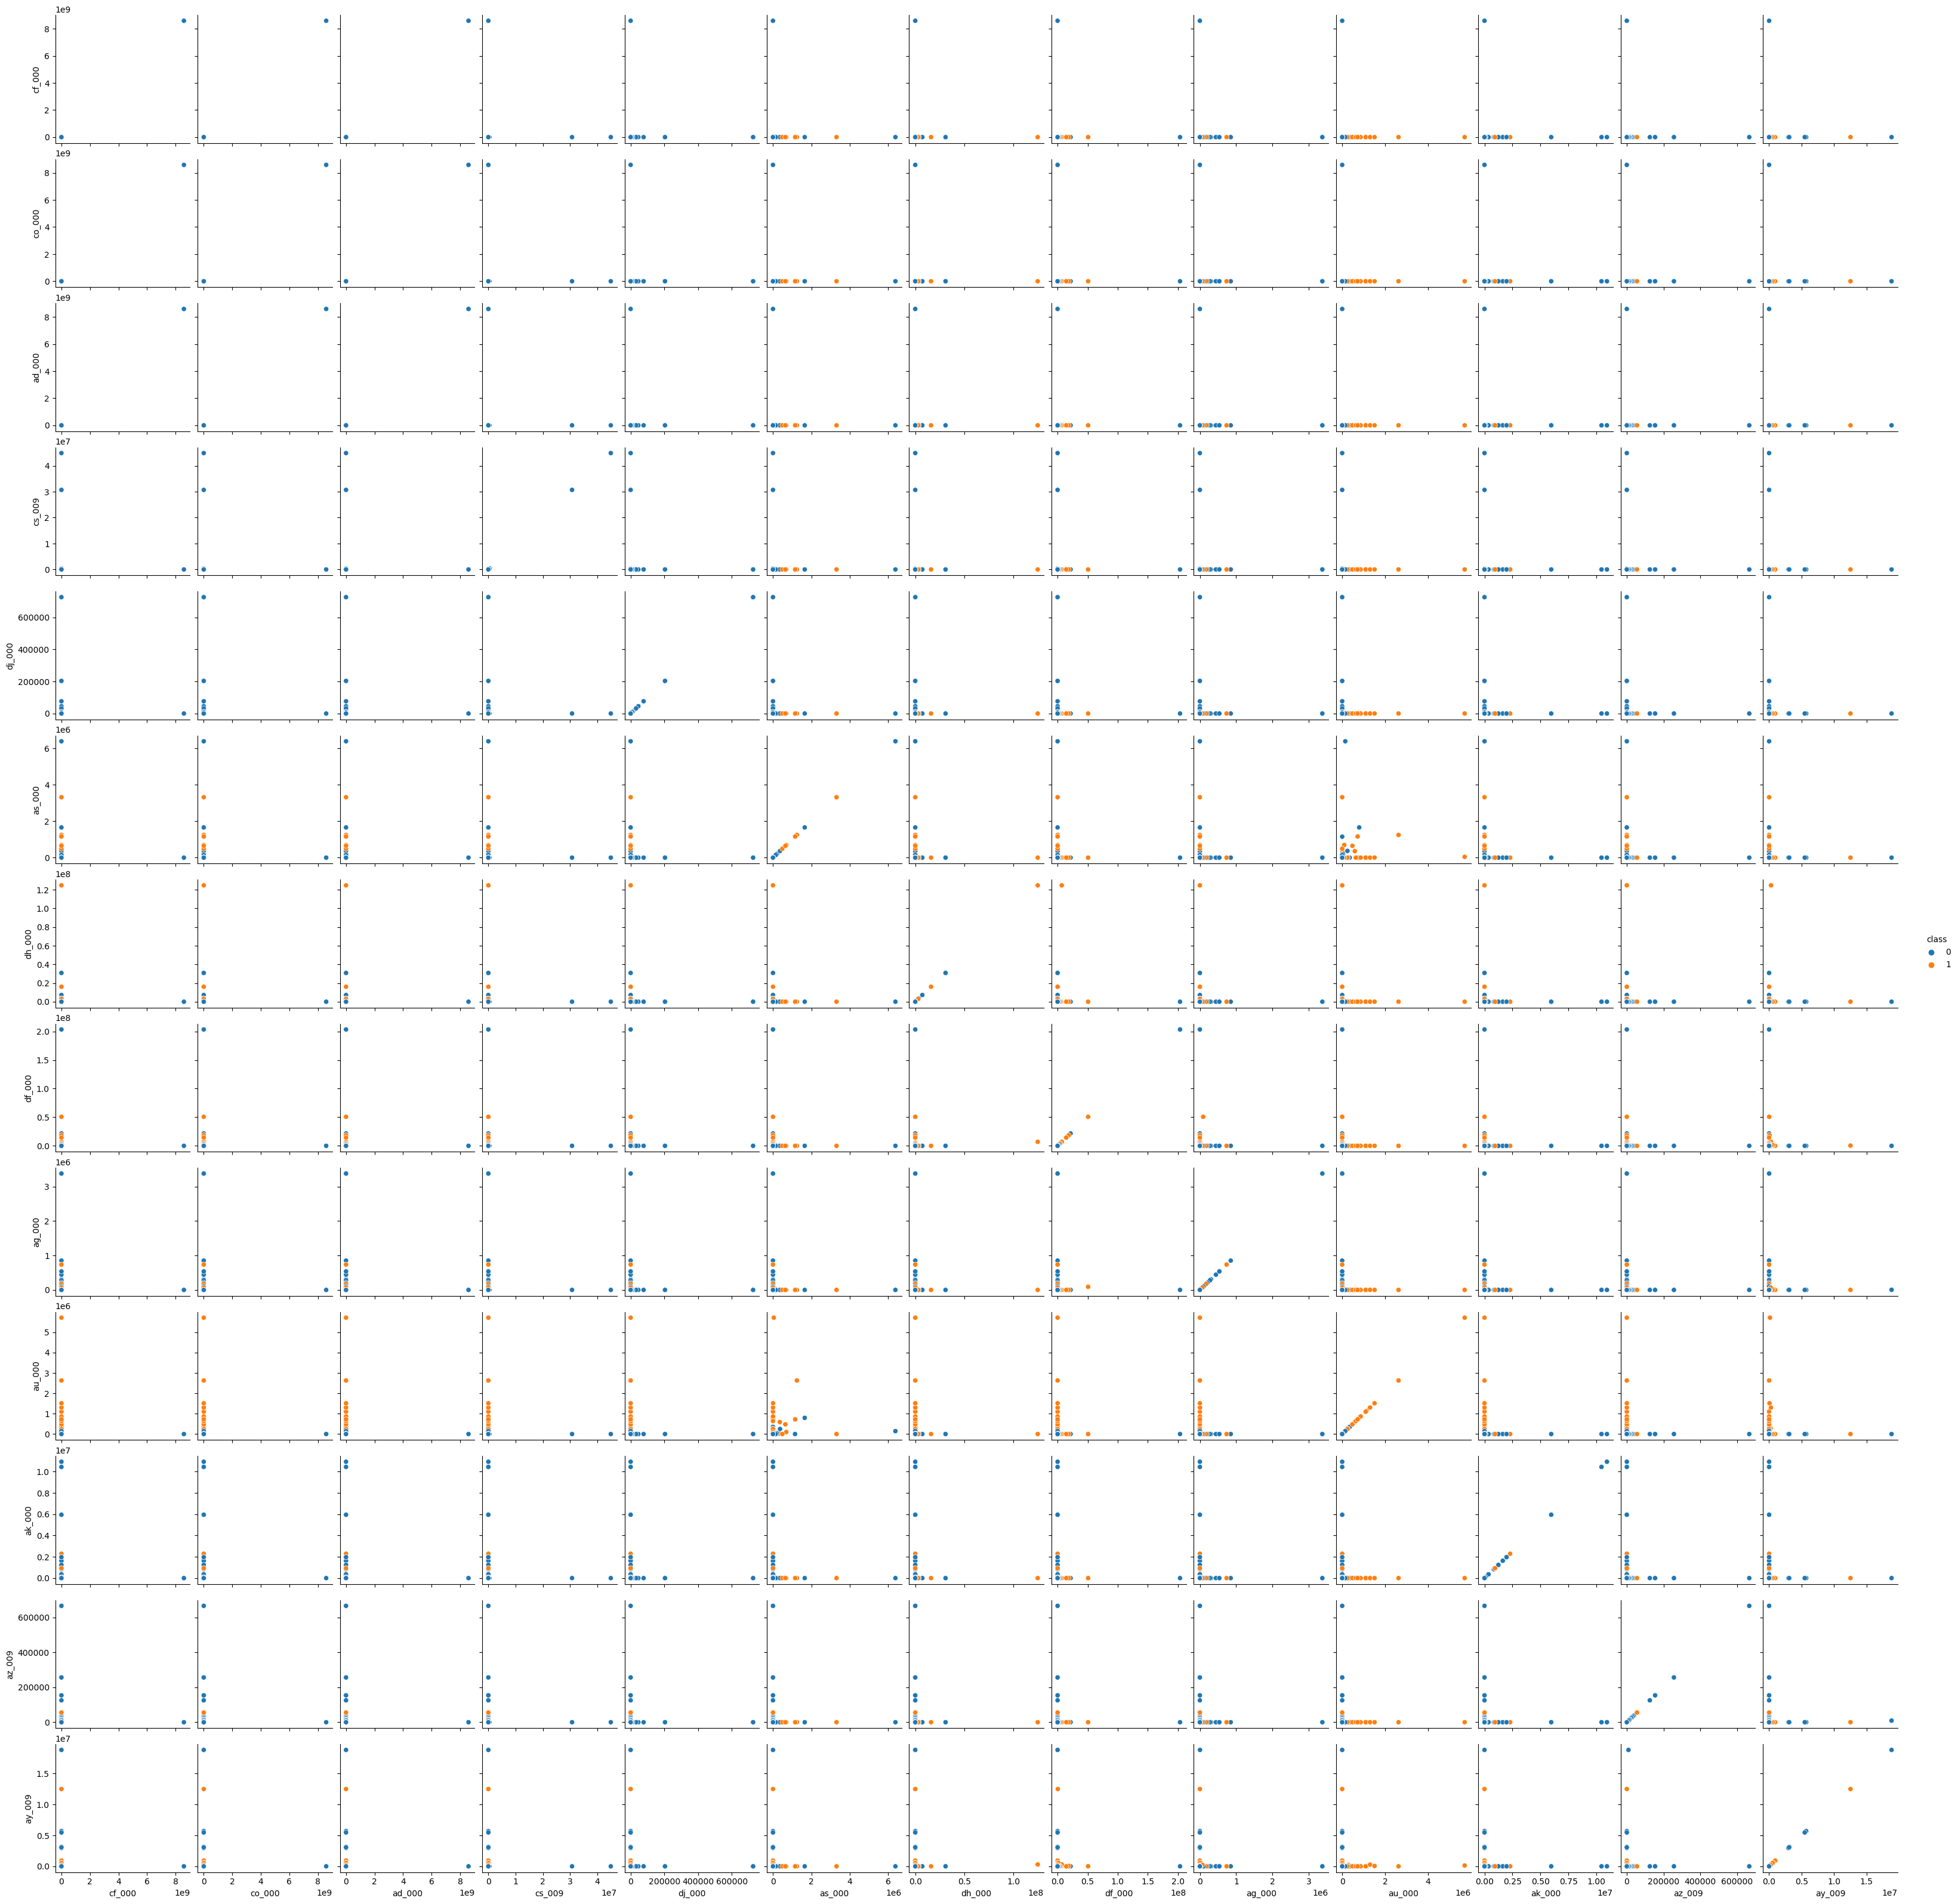

In [33]:
###pairplottt
sns.pairplot(selected_plot_data,hue='class', diag_kind = None)

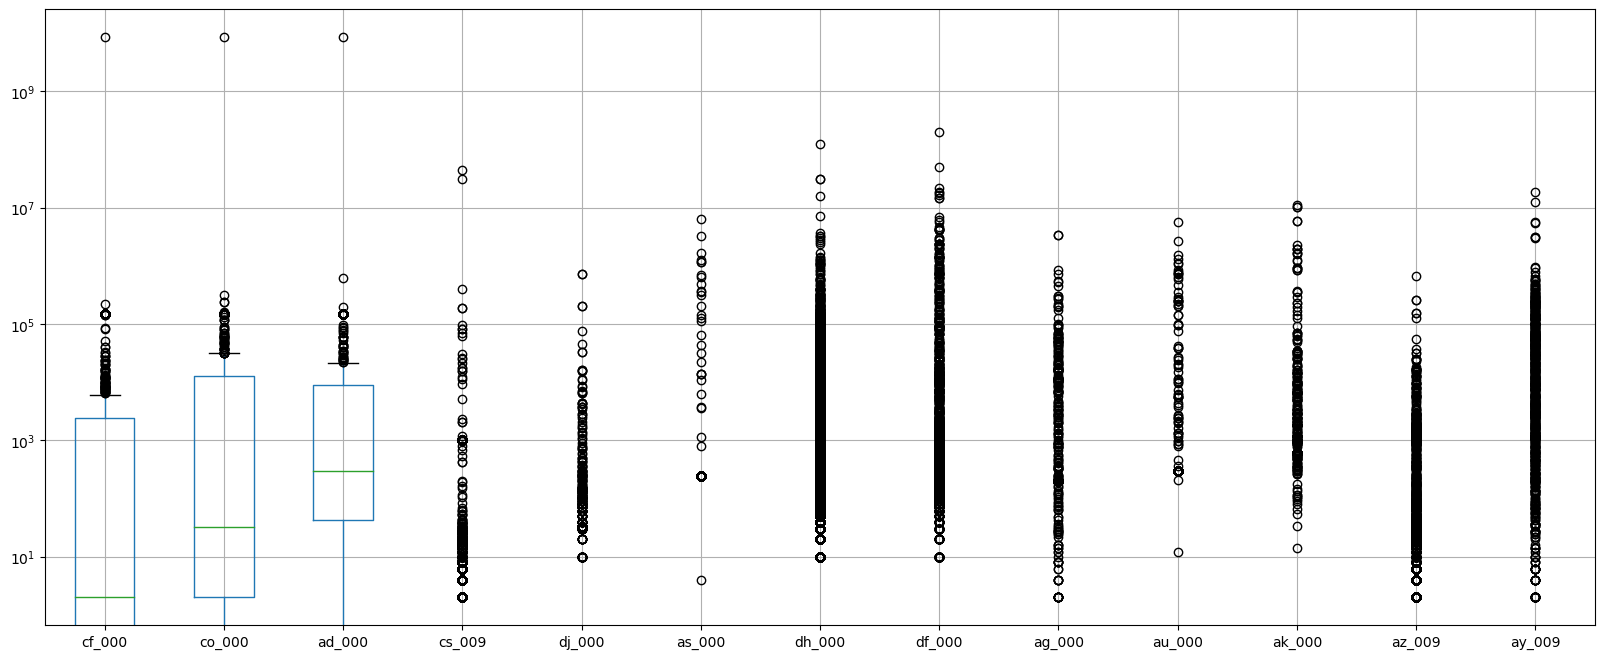

In [34]:
selected_dataset.boxplot(figsize=(20,8))
plt.yscale('log')

In [35]:
full_dataset['class'].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

In [36]:
model = RandomForestClassifier(oob_score = True)
model = model.fit(Train_data_X, Train_data_Y)
y_predicted_test = model.predict(Test_data_X)
Test_Accuracy = accuracy_score(Test_data_Y, y_predicted_test)

In [37]:
Test_error=1-Test_Accuracy
Test_error = round(Test_error, 3)
print('TEST ERROR:', Test_error)

TEST ERROR: 0.008


In [38]:
oobError = 1-model.oob_score_
oobError = round(oobError, 3)
print('OUT OF BAG ERROR:', oobError)

OUT OF BAG ERROR: 0.006


In [39]:
Confusion_Matrix_Test = confusion_matrix(Test_data_Y,y_predicted_test)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test.ravel()
print('Confusion matrix for test data-->'+'\n',Confusion_Matrix_Test)

Confusion matrix for test data-->
 [[15610    15]
 [  110   265]]


In [40]:
print('Misclassification for test data->>',TestFP+TestFN)

Misclassification for test data->> 125


In [41]:
y_predicted_Train = model.predict(Train_data_X)
Train_Accuracy=accuracy_score(Train_data_Y, y_predicted_Train)
Train_Accuracy

0.9999833333333333

In [42]:
Confusion_Matrix_Train = confusion_matrix(Train_data_Y, y_predicted_Train)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train.ravel()
print('Confusion matrix for train data-->'+'\n',Confusion_Matrix_Train)

Confusion matrix for train data-->
 [[59000     0]
 [    1   999]]


In [43]:
print('Misclassification for train data->>',TrainFP+TrainFN)

Misclassification for train data->> 1


AUC value for test data is->> 0.853


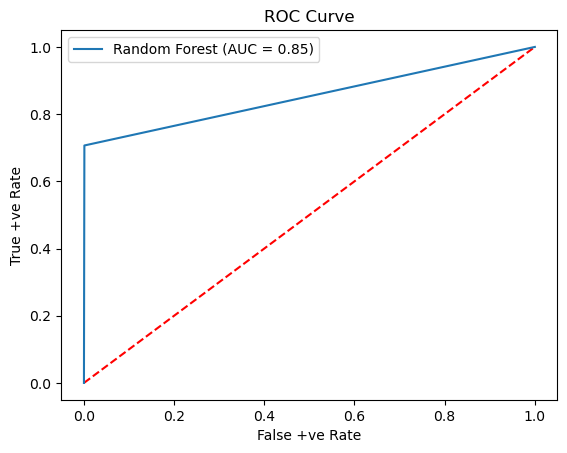

In [44]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, y_predicted_test)
Test_AUC = round(roc_auc_score(Test_data_Y, y_predicted_test), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Test_FPR, Test_TPR, label='Random Forest (AUC = %0.2f)' % Test_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->>',Test_AUC)

AUC value for test data is->> 1.0


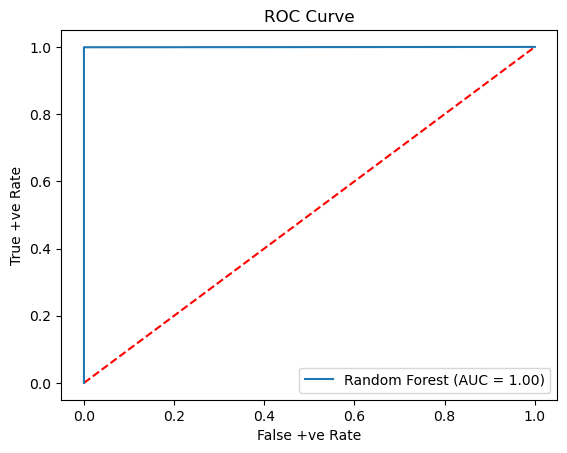

In [45]:
Train_FPR, Train_TPR, Train_Threshold = roc_curve(Train_data_Y, y_predicted_Train)
Train_AUC = round(roc_auc_score(Train_data_Y, y_predicted_Train), 3)
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(Test_FPR, Test_TPR, marker='.')
plt.plot(Train_FPR, Train_TPR, label='Random Forest (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->>',Train_AUC)

In [46]:
model_d = RandomForestClassifier(max_depth=5, random_state=7, n_jobs = -1,oob_score= True, class_weight = "balanced")
model_d = model_d.fit(Train_data_X, Train_data_Y)

In [47]:
y_predicted_test = model_d.predict(Test_data_X)
Test_Accuracy = accuracy_score(Test_data_Y, y_predicted_test)

#Calculating Test error
Test_error_balanced=1-Test_Accuracy
Test_error_balanced = round(Test_error_balanced, 3)
print('TEST ERROR:', Test_error_balanced)



# Calculation oob error
oobError_balanced = 1-model_d.oob_score_
oobError_balanced = round(oobError_balanced, 3)
print('OUT OF BAG ERROR:', oobError_balanced)






TEST ERROR: 0.039
OUT OF BAG ERROR: 0.041


In [48]:
Confusion_Matrix_Test = confusion_matrix(Test_data_Y,y_predicted_test)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test.ravel()
print('Confusion matrix for test data-->'+'\n',Confusion_Matrix_Test)

print('Misclassification for test data->>',TestFP+TestFN)


y_predicted_Train = model_d.predict(Train_data_X)
Train_Accuracy_balanced=accuracy_score(Train_data_Y, y_predicted_Train)
Train_Accuracy_balanced

Confusion_Matrix_Train = confusion_matrix(Train_data_Y, y_predicted_Train)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train.ravel()
print('Confusion matrix for train data-->'+'\n',Confusion_Matrix_Train)

print('Misclassification for train data->>',TrainFP+TrainFN)


Confusion matrix for test data-->
 [[15013   612]
 [   13   362]]
Misclassification for test data->> 625
Confusion matrix for train data-->
 [[56617  2383]
 [   29   971]]
Misclassification for train data->> 2412


AUC value for test data is->> 0.963


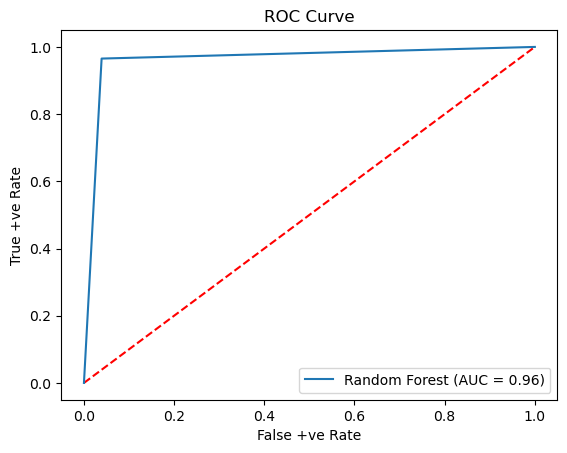

In [49]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, y_predicted_test)
Test_AUC = round(roc_auc_score(Test_data_Y, y_predicted_test), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Test_FPR, Test_TPR, label='Random Forest (AUC = %0.2f)' % Test_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->>',Test_AUC)


#ROC and AUC for test data.

AUC value for test data is->> 0.963


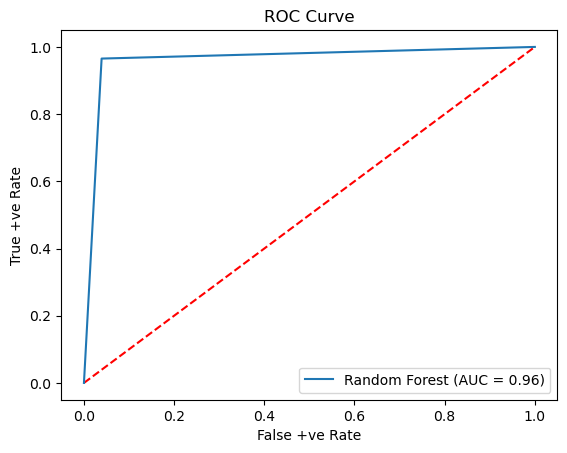

In [50]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, y_predicted_test)
Test_AUC = round(roc_auc_score(Test_data_Y, y_predicted_test), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Test_FPR, Test_TPR, label='Random Forest (AUC = %0.2f)' % Test_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is->>',Test_AUC)


#ROC and AUC for test data.

AUC value for train data is->> 0.965


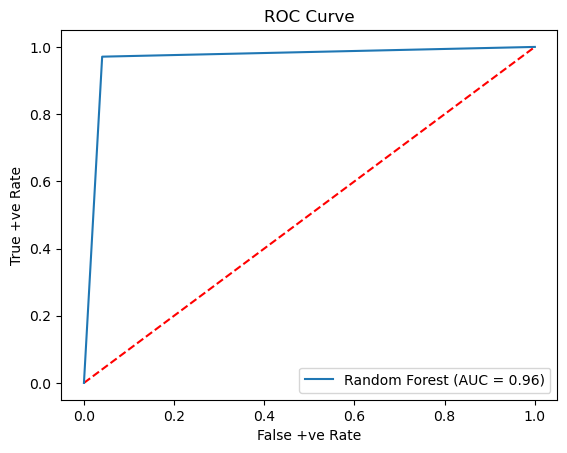

In [51]:
Train_FPR, Train_TPR, Train_Threshold = roc_curve(Train_data_Y, y_predicted_Train)
Train_AUC = round(roc_auc_score(Train_data_Y, y_predicted_Train), 3)
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(Test_FPR, Test_TPR, marker='.')
plt.plot(Train_FPR, Train_TPR, label='Random Forest (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is->>',Train_AUC)

In [52]:
list1=[]
l1=[]
l1.append(Test_error)
l1.append(Test_error_balanced)
l1.append(oobError)
l1.append(oobError_balanced)
list1.append(l1)

In [53]:
print(tabulate(list1,headers=['Test Error(RF)','Test Error(Balanced RF)','Oob error(RF)','Oob error(Balanced RF)']))


  Test Error(RF)    Test Error(Balanced RF)    Oob error(RF)    Oob error(Balanced RF)
----------------  -------------------------  ---------------  ------------------------
           0.008                      0.039            0.006                     0.041


### XGBoost and Model Trees

In [54]:
alphas=[1e-4,1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3,1e+4]

xgbModel = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, eval_metric='logloss')
xgbParameters = {'reg_alpha': alphas}
xgbModelVal = GridSearchCV(xgbModel, xgbParameters, cv=5)
xgbModelVal = xgbModelVal.fit(Train_data_X, Train_data_Y)

BestAlpha = xgbModelVal.best_params_['reg_alpha']
BestAlpha = round(BestAlpha, 3)

print('Best alpha is->>', BestAlpha)

Best alpha is->> 0.01


In [55]:

finalXGBModel = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, eval_metric='logloss',reg_alpha=BestAlpha)
finalXGBModel = finalXGBModel.fit(Train_data_X, Train_data_Y)

PredictedY = finalXGBModel.predict(Test_data_X)
xgboostMSE = mean_squared_error(Test_data_Y, PredictedY)
xgboostMSE = round(xgboostMSE, 3)

print('TEST MSE FOR XGBOOST REGRESSION is->>', xgboostMSE)

TEST MSE FOR XGBOOST REGRESSION is->> 0.006


In [56]:
Test_Accuracy = accuracy_score(Test_data_Y,PredictedY)
Test_error_xgb=1-Test_Accuracy
Test_error_xgb

0.00593750000000004

In [57]:
Confusion_Matrix_Test = confusion_matrix(Test_data_Y,PredictedY)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test.ravel()
print('Confusion matrix for test data-->'+'\n',Confusion_Matrix_Test)

Confusion matrix for test data-->
 [[15611    14]
 [   81   294]]


In [58]:
PredictedY_train = finalXGBModel.predict(Train_data_X)
Confusion_Matrix_Train = confusion_matrix(Train_data_Y, PredictedY_train)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train.ravel()
print('Confusion matrix for train data-->'+'\n',Confusion_Matrix_Train)

Confusion matrix for train data-->
 [[59000     0]
 [    1   999]]


In [59]:
Train_Accuracy = accuracy_score(Train_data_Y,PredictedY_train)
Train_error_XGB=1-Train_Accuracy
print('Train error for XG Boost',Train_error_XGB)

Train error for XG Boost 1.666666666666483e-05


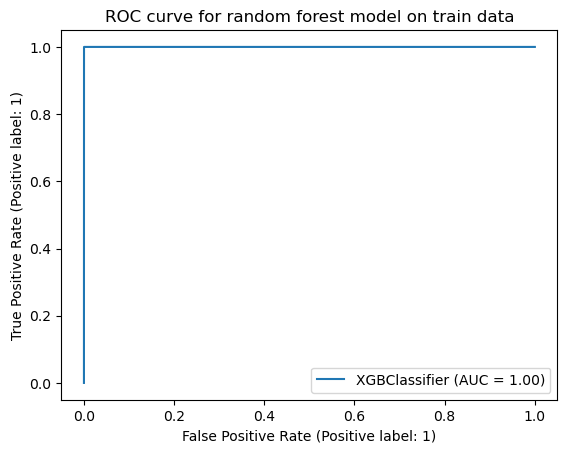

In [62]:
# plot_roc_curve(finalXGBModel, Train_data_X, Train_data_Y, name = 'XG Boost on testing data')
from sklearn.metrics import RocCurveDisplay
display = RocCurveDisplay.from_estimator(finalXGBModel,Train_data_X,Train_data_Y)
plt.title('ROC curve for random forest model on train data')
plt.show()

AUC value for train data is->> 1.0


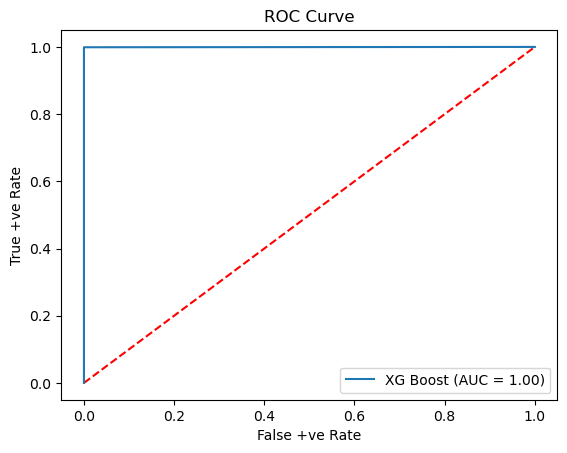

In [63]:
Train_FPR, Train_TPR, Train_Threshold = roc_curve(Train_data_Y, PredictedY_train)
Train_AUC = round(roc_auc_score(Train_data_Y, PredictedY_train), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Train_FPR, Train_TPR, label='XG Boost (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is->>',Train_AUC)

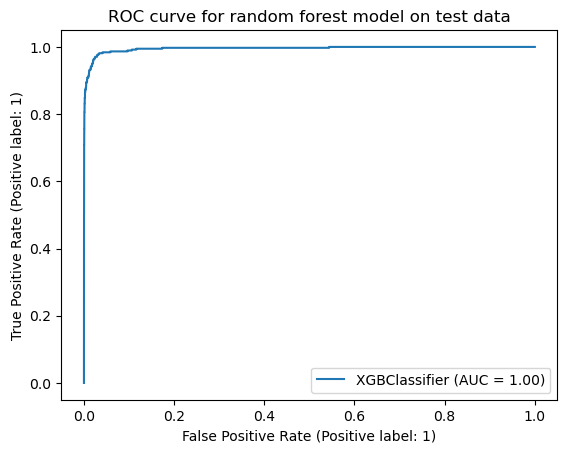

In [65]:
display = RocCurveDisplay.from_estimator(finalXGBModel,Test_data_X,Test_data_Y)
plt.title('ROC curve for random forest model on test data')
plt.show()

AUC value for train data is->> 0.892


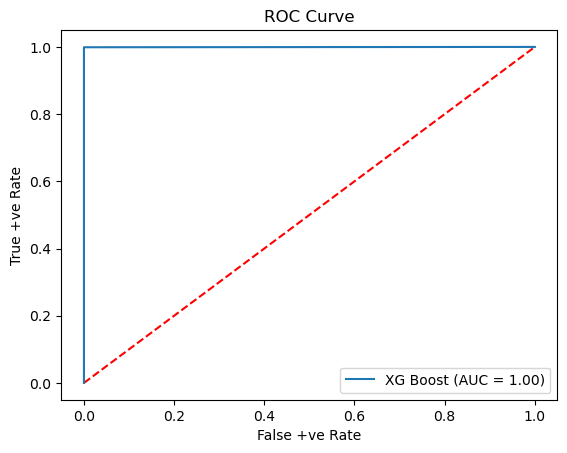

In [66]:
Test_FPR, Test_TPR, Test_Threshold = roc_curve(Test_data_Y, PredictedY)
Test_AUC = round(roc_auc_score(Test_data_Y, PredictedY), 3)
plt.plot([0, 1], [0, 1],'r--')
plt.plot(Train_FPR, Train_TPR, label='XG Boost (AUC = %0.2f)' % Train_AUC)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is->>',Test_AUC)

### Use of SMOTE to pre-process the data

In [67]:
from imblearn.over_sampling import SMOTE

In [68]:
sm = SMOTE(random_state=42)

In [69]:
X_result, Y_result = sm.fit_resample(Train_data_X, Train_data_Y)

In [70]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)], ['classifier', xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, eval_metric='logloss')]])
param_grid = {'classifier__reg_alpha':[1e-3, 1e-2, 1e-1, 1,1e+1,1e+2,1e+3]}
xgbModelVal_smote = GridSearchCV(estimator=pipeline, param_grid = param_grid, cv=5)
xgbModelVal_smote = xgbModelVal_smote.fit(X_result, Y_result)

In [71]:
BestAlpha_smote = xgbModelVal_smote.best_params_['classifier__reg_alpha']
BestAlpha_smote = round(BestAlpha_smote, 3)

print('Best alpha is->>', BestAlpha_smote)

Best alpha is->> 0.01


In [72]:
finalXGBModel_smote = xgb.XGBClassifier(objective="binary:logistic",use_label_encoder=False, eval_metric='logloss',reg_alpha=BestAlpha_smote)
finalXGBModel_smote = finalXGBModel_smote.fit(X_result, Y_result)

PredictedY_smote = finalXGBModel_smote.predict(Test_data_X)
xgboostMSE_smote = mean_squared_error(Test_data_Y, PredictedY_smote)
xgboostMSE_smote = round(xgboostMSE_smote, 3)

print('TEST MSE FOR XGBOOST REGRESSION is->>', xgboostMSE_smote)

TEST MSE FOR XGBOOST REGRESSION is->> 0.007


In [73]:
Confusion_Matrix_Test_smote = confusion_matrix(Test_data_Y,PredictedY_smote)
TestTN, TestFP, TestFN, TestTP = Confusion_Matrix_Test_smote.ravel()
print('Confusion matrix for test data-->'+'\n',Confusion_Matrix_Test_smote)

Confusion matrix for test data-->
 [[15587    38]
 [   67   308]]


In [74]:
PredictedY_train_smote = finalXGBModel_smote.predict(X_result)
Confusion_Matrix_Train_smote = confusion_matrix(Y_result, PredictedY_train_smote)
TrainTN, TrainFP, TrainFN, TrainTP = Confusion_Matrix_Train_smote.ravel()
print('Confusion matrix for train data-->'+'\n',Confusion_Matrix_Train_smote)

Confusion matrix for train data-->
 [[59000     0]
 [    1 58999]]


In [75]:
Train_Accuracy_sm = accuracy_score(Y_result,PredictedY_train_smote)
Train_error_XGB_sm=1-Train_Accuracy_sm
print('Train error for XG Boost',Train_error_XGB_sm)

Train error for XG Boost 8.47457627117798e-06


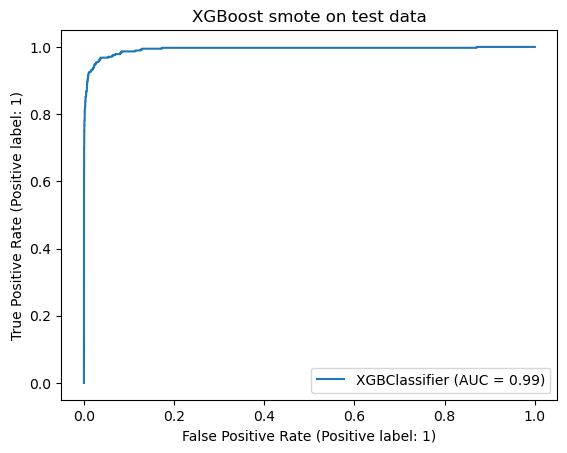

In [78]:
# plot_roc_curve(finalXGBModel_smote, Test_data_X, Test_data_Y, name = 'XG Boost on testing data')
display = RocCurveDisplay.from_estimator(finalXGBModel_smote,Test_data_X,Test_data_Y)
plt.title('XGBoost smote on test data')
plt.show()

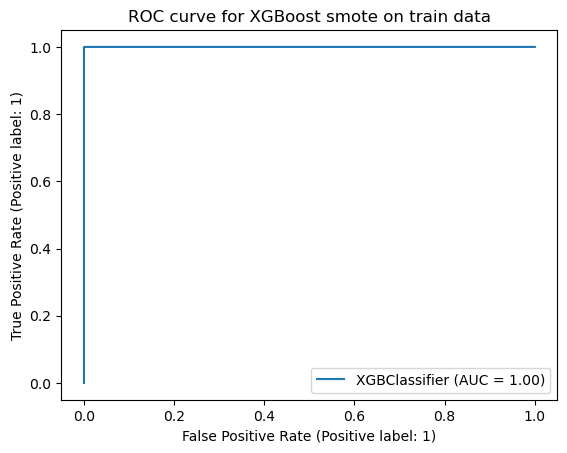

In [79]:
# plot_roc_curve(finalXGBModel_smote, Train_data_X, Train_data_Y, name = 'XG Boost on testing data')
display = RocCurveDisplay.from_estimator(finalXGBModel_smote,Train_data_X,Train_data_Y)
plt.title('ROC curve for XGBoost smote on train data')
plt.show()


Here, after using smote our test error increased a little but it seems acceptable as we are synthetically adding more data to increase our positive class to make it more balanced. Now, this classifier is better predictor as it is getting trained on a much more balanced dataset.